# Settings

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_auc_score
import time
import psutil
#import utils
#import os
#import csv

In [ ]:
def load_data1(csv_filepath):
    '''
    Load data from a csv file.
    :param csv_filepath: path of the .csv file containing the data to load/extract
    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)
    headers = data.columns
    x_data = data[headers[0]]
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]
    X = np.array(X_data)
    
    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y

X, Y = load_data1('dataset1.csv')
print("X: " + str(X.shape))
if Y is not None:
    print("Y: " + str(Y.shape))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)
#normalization of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Results table definition 

In [ ]:
results = {
    'Algorithm': ['Decision Tree', 'SVM', 'XGBoost', 'Naive Bayes'],
    'Acc. without CV': [],
    'Acc. with CV': [],
    'T. without CV [s]': [],
    'T. with CV [s]': [],
    'CPU usage without CV [%]': [],
    'CPU usage with CV [%]': [],    
}

## Unbalanced dataset verification

In [ ]:
import pandas as pd

target_balance = sorted(Y)
conteggio_numeri = {}

for numero in target_balance:
    if numero in conteggio_numeri:
        conteggio_numeri[numero] += 1
    else:
        conteggio_numeri[numero] = 1

df = pd.DataFrame(list(conteggio_numeri.items()), columns=["Number", "Count"])

count_alert = any(conteggio < 1000 for conteggio in conteggio_numeri.values())

if count_alert:
    print("WARNING! Unbalanced Dataset")
else:
    print("Balanced Dataset")
    
df.head(10)

# Decision Tree

In [48]:
start_time_DT = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
end_time_DT = time.time()
time_without_cv_DT = end_time_DT - start_time_DT
cpu_usage_without_cv_DT = psutil.cpu_percent()


#Print
print(f"DT Accuracy: {round(dt_accuracy*100, 2)} %")
print(f"CPU Usage without CV: {cpu_usage_without_cv_DT} %")
print(f'Precision: {dt_precision:.3f}')
print(f"Recall: {dt_recall:.3f}")
print(f"f1: {dt_f1:.3f}")

results['Acc. without CV'].append(round(dt_accuracy * 100, 2))
results['T. without CV [s]'].append(round(time_without_cv_DT, 2))
results['CPU usage without CV [%]'].append(psutil.cpu_percent())

#Cross-Validation
start_time_DT_CV = time.time()
dt_cv_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=3)
end_time_DT_CV = time.time()
time_with_cv_DT = end_time_DT_CV - start_time_DT_CV
cpu_usage_with_cv_DT = psutil.cpu_percent()
dt_precision_CV = precision_score(y_test, dt_predictions, average='weighted')
dt_recall_CV = recall_score(y_test, dt_predictions, average='weighted')
dt_f1_CV = f1_score(y_test, dt_predictions, average='weighted')

#Print
print(f"DT CV Accuracy: {np.mean(dt_cv_scores)*100:.2f} %")
print(f"CPU Usage with CV: {cpu_usage_with_cv_DT} %")
print(f'Precision_CV: {dt_precision_CV:.3f}')
print(f"Recall_CV: {dt_recall_CV:.3f}")
print(f"f1_CV: {dt_f1_CV:.3f}")

results['Acc. with CV'].append(round(np.mean(dt_cv_scores) * 100, 2))
results['T. with CV [s]'].append(round(time_with_cv_DT, 2))
results['CPU usage with CV [%]'].append(psutil.cpu_percent())

DT Accuracy: 97.29 %
CPU Usage without CV: 3.1 %
Precision: 0.973
Recall: 0.973
f1: 0.973
DT CV Accuracy: 97.40 %
CPU Usage with CV: 20.0 %
Precision_CV: 0.973
Recall_CV: 0.973
f1_CV: 0.973


### Decision Tree - Confusion Matrix

In [ ]:
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_DT.svg', format='svg')
plt.show()

# Support Vector Machine

In [1]:
start_time_SVM = time.time()
svm = SVC()
#svm = SVC(kernel= 'poly', degree=3)
#svm = SVC(kernel='rbf')
#svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

end_time_SVM = time.time()
time_without_cv_SVM = end_time_SVM - start_time_SVM
cpu_usage_without_cv_SVM = psutil.cpu_percent()

#Print
print(f"SVM Accuracy: {round(svm_accuracy*100, 2)} %")
print(f"CPU Usage without CV: {cpu_usage_without_cv_SVM} %")
print(f'Precision: {svm_precision:.3f}')
print(f"Recall: {svm_recall:.3f}")
print(f"f1: {svm_f1:.3f}")

results['Acc. without CV'].append(round(svm_accuracy * 100, 2))
results['T. without CV [s]'].append(round(time_without_cv_SVM, 2))
results['CPU usage without CV [%]'].append(psutil.cpu_percent())

#Cross-validation
start_time_SVM_CV = time.time()
svm_cv_scores = cross_val_score(SVC(), X, Y, cv=5)
svm_precision_CV = precision_score(y_test, svm_predictions, average='weighted')
svm_recall_CV = recall_score(y_test, svm_predictions, average='weighted')
svm_f1_CV = f1_score(y_test, svm_predictions, average='weighted')

end_time_SVM_CV = time.time()
time_with_cv_SVM = end_time_SVM_CV - start_time_SVM_CV
cpu_usage_with_cv_SVM = psutil.cpu_percent()

#Print
print(f"SVM Cross-Validation Accuracy: {np.mean(svm_cv_scores)*100:.2f} %")
print(f"CPU Usage with CV: {cpu_usage_with_cv_SVM} %")
print(f'Precision_CV: {svm_precision_CV:.3f}')
print(f"Recall_CV: {svm_recall_CV:.3f}")
print(f"f1_CV: {svm_f1_CV:.3f}")

results['Acc. with CV'].append(round(np.mean(svm_cv_scores) * 100, 2))
results['T. with CV [s]'].append(round(time_with_cv_SVM, 2))
results['CPU usage with CV [%]'].append(psutil.cpu_percent())

NameError: name 'time' is not defined

### Support Vector Machine - Confusion Matrix

In [ ]:
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_SVM.svg', format='svg')
plt.show()

# XGBoost

In [ ]:
start_time_XGB = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')
end_time_XGB = time.time()
time_without_cv_XGB = end_time_XGB - start_time_XGB
cpu_usage_without_cv_XGB = psutil.cpu_percent()

#Print
print(f"XGBoost Accuracy: {round(xgb_accuracy*100,2)} %")
print(f"CPU Usage without CV: {cpu_usage_without_cv_XGB} %")
print(f'Precision: {xgb_precision:.3f}')
print(f"Recall: {xgb_recall:.3f}")
print(f"f1: {xgb_f1:.3f}")

results['Acc. without CV'].append(round(xgb_accuracy * 100, 2))
results['T. without CV [s]'].append(round(time_without_cv_XGB, 2))
results['CPU usage without CV [%]'].append(psutil.cpu_percent())

#Cross-Validation
start_time_XGB_CV = time.time()
xgb_cv_scores = cross_val_score(XGBClassifier(), X, Y, cv=5)
xgb_precision_CV = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall_CV = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1_CV = f1_score(y_test, xgb_predictions, average='weighted')
end_time_XGB_CV = time.time()
time_with_cv_XGB = end_time_XGB_CV - start_time_XGB_CV
cpu_usage_with_cv_XGB = psutil.cpu_percent()

#Print
print(f"XGBoost CV Accuracy: {np.mean(xgb_cv_scores)*100:.2f} %")
print(f"CPU Usage with CV: {cpu_usage_with_cv_XGB} %")
print(f'Precision: {xgb_precision_CV:.3f}')
print(f"Recall: {xgb_recall_CV:.3f}")
print(f"f1: {xgb_f1_CV:.3f}")

results['Acc. with CV'].append(round(np.mean(xgb_cv_scores) * 100, 2))
results['T. with CV [s]'].append(round(time_with_cv_XGB, 2))
results['CPU usage with CV [%]'].append(psutil.cpu_percent())

### XGBoost - Confusion Matrix 

In [ ]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, cmap='YlOrBr', fmt='d', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_XGB.svg', format='svg')
plt.show()

# Naive Bayes

In [49]:
start_time_NB = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
end_time_NB = time.time()
time_without_cv_NB = end_time_NB - start_time_NB
cpu_usage_without_cv_NB = psutil.cpu_percent()

#Print
print(f"Naive Bayes Accuracy: {round(nb_accuracy*100, 2)} %")
print(f"CPU Usage without CV: {cpu_usage_without_cv_NB} %")
print(f'Precision: {nb_precision:.3f}')
print(f"Recall: {nb_recall:.3f}")
print(f"f1: {nb_f1:.3f}")

results['Acc. without CV'].append(round(nb_accuracy * 100, 2))
results['T. without CV [s]'].append(round(time_without_cv_NB, 2))
results['CPU usage without CV [%]'].append(psutil.cpu_percent())

# Cross-validation
start_time_NB_CV = time.time()
nb_cv_scores = cross_val_score(GaussianNB(), X, Y, cv=2)
nb_precision_CV = precision_score(y_test, nb_predictions, average='weighted')
nb_recall_CV = recall_score(y_test, nb_predictions, average='weighted')
nb_f1_CV = f1_score(y_test, nb_predictions, average='weighted')
end_time_NB_CV = time.time()
time_with_cv_NB = end_time_NB_CV - start_time_NB_CV
cpu_usage_with_cv_NB = psutil.cpu_percent()

#Print
print(f"Naive Bayes Cross-Validation Accuracy: {np.mean(nb_cv_scores)*100:.2f} %")
print(f"CPU Usage with CV: {cpu_usage_with_cv_NB} %")
print(f'Precision_CV: {nb_precision_CV:.3f}')
print(f"Recall_CV: {nb_recall_CV:.3f}")
print(f"f1_CV: {nb_f1_CV:.3f}")


results['Acc. with CV'].append(round(np.mean(nb_cv_scores) * 100, 2))
results['T. with CV [s]'].append(round(time_with_cv_NB, 2))
results['CPU usage with CV [%]'].append(psutil.cpu_percent())

Naive Bayes Accuracy: 96.76 %
CPU Usage without CV: 16.1 %
Precision: 0.971
Recall: 0.968
f1: 0.968
Naive Bayes Cross-Validation Accuracy: 97.68 %
CPU Usage with CV: 22.5 %
Precision_CV: 0.971
Recall_CV: 0.968
f1_CV: 0.968


## Confucion matrix Naive Bayes

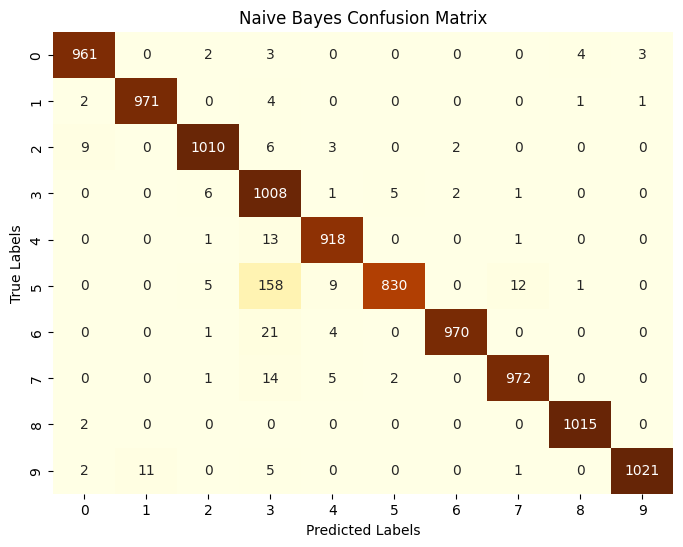

In [46]:
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap='YlOrBr', fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_NB.svg', format='svg')
plt.show()

# Results Table

In [ ]:
#df_results = pd.DataFrame(results)
#df_results.head(10)
#print(results)
#for i in results:
#   print()
for key, values in results.items():
    print(f"{key}: {values}")

# Prediction - Decision Tree

### Decision Tree without Cross - Validation

In [ ]:
X_blind =load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_DT = []

for feature in X_blind_transformed:
    pred = decision_tree.predict([feature])
    pred_list_DT.append(pred)
    flat_list_DT = [num for sublist in pred_list_DT for num in sublist]

data = {
    'Output predicted': flat_list_DT,
}

df_pre_DT = pd.DataFrame(data)
df_pre_DT.head(10000)

### Decision Tree with Cross - Validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_DTCV = []

best_model_index = np.argmax(dt_cv_scores)
best_dt_model = DecisionTreeClassifier()
best_dt_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_dt_model.predict([feature])
    pred_list_DTCV.append(pred)
    flat_list_DTCV = [num for sublist in pred_list_DTCV for num in sublist]
    
data = {
    'Output predicted': flat_list_DTCV,
}

df_pre_DTCV = pd.DataFrame(data)
df_pre_DTCV.head(10000)

# Prediction - Support Vector Machine

### Support Vector Machine without Cross-Validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_SVM = []

for feature in X_blind_transformed:
    pred = svm.predict([feature])
    pred_list_SVM.append(pred)
    flat_list_SVM = [num for sublist in pred_list_SVM for num in sublist]
    
data = {
    'Output predicted': flat_list_SVM,
}

df_pre_SVM = pd.DataFrame(data)
df_pre_SVM.head(10000)

### Support Vector Machine with Cross-Validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_SVMCV = []

best_model_index = np.argmax(svm_cv_scores)
best_svm_model = SVC()
best_svm_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_svm_model.predict([feature])
    pred_list_SVMCV.append(pred)
    flat_list_SVMCV = [num for sublist in pred_list_SVMCV for num in sublist]
    
data = {
    'Output predicted': flat_list_SVMCV,
}

df_pre_SVMCV = pd.DataFrame(data)
df_pre_SVMCV.head(10000)

# Prediction - XGB

### XGB without Cross-Validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_XGB = []

for feature in X_blind_transformed:
    pred = xgb.predict([feature])
    pred_list_XGB.append(pred)
    flat_list_XGB = [num for sublist in pred_list_XGB for num in sublist]
    
data = {
    'Output predicted': flat_list_XGB,
}

df_pre_XGB = pd.DataFrame(data)
df_pre_XGB.head(10000)

### XGB with Cross-Validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_XGBCV = []

best_model_index = np.argmax(xgb_cv_scores)
best_xgb_model = XGBClassifier()
best_xgb_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_xgb_model.predict([feature])
    pred_list_XGBCV.append(pred)
    flat_list_XGBCV = [num for sublist in pred_list_XGBCV for num in sublist]
    
data = {
    'Output predicted': flat_list_XGBCV,
}

df_pre_XGBCV = pd.DataFrame(data)
df_pre_XGBCV.head(10000)

# Prediction-Naive Bayes

## Naive Bayes without cross-validation

In [45]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_NB = []

for feature in X_blind_transformed:
    pred = nb_classifier.predict([feature])
    pred_list_NB.append(pred)
    flat_list_NB = [num for sublist in pred_list_NB for num in sublist]
    
data = {
    'Output predicted': flat_list_NB,
}

df_pre_NB = pd.DataFrame(data)
df_pre_NB.to_csv('blind_test_1.csv', index=False)
df_pre_NB.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


## Naive Bayes with cross-validation

In [ ]:
X_blind = load_data1("blind_test1.csv")[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_NBCV = []

best_model_index = np.argmax(nb_cv_scores)
best_nb_model = GaussianNB()
best_nb_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_nb_model.predict([feature])
    pred_list_NBCV.append(pred)
    flat_list_NBCV = [num for sublist in pred_list_NBCV for num in sublist]
    
data = {
    'Output predicted': flat_list_NBCV,
}

df_pre_NBCV = pd.DataFrame(data)
df_pre_NBCV.head(10000)

# Export results to CSV - Blind_test1.csv

### Official Prediction - MLEx1 Blind_test.csv

### Predictions Table

In [47]:
predictions_df = pd.DataFrame({
    'Decision Tree': flat_list_DT,
    'SVM': flat_list_SVM,
    'XGB': flat_list_XGB,
    'NB' : flat_list_NB,
    
    'Decision Tree CV': flat_list_DTCV,
    'SVM CV': flat_list_SVMCV,
    'XGB CV': flat_list_XGBCV,
    'NB CV' : flat_list_NBCV,
})

predictions_df.to_excel('predictions_blind_test1.xlsx', index=True)

NameError: name 'flat_list_DT' is not defined

### Comparison of algorithms with and without Cross - Validation

In [ ]:
counter_DT = 0
counter_SVM = 0
counter_XGB = 0
counter_NB = 0

for i1, j1 in zip(flat_list_DT, flat_list_DTCV):
    if i1 == j1:
        counter_DT += 1
    else:
        counter_DT += 0


for i2, j2 in zip(flat_list_SVM, flat_list_SVMCV):
    if i2 == j2:
        counter_SVM += 1
    else:
        counter_SVM += 0

        
for i3, j3 in zip(flat_list_XGB, flat_list_XGBCV):
    if i3 == j3:
        counter_XGB += 1
    else:
        counter_XGB += 0

for i4, j4 in zip(flat_list_NB, flat_list_NBCV):
    if i4 == j4:
        counter_NB += 1
    else:
        counter_NB += 0
        
data = {
    'Modello': ['DT', 'SVM', 'XGB', 'NB'],
    'Equal results [%]': [ counter_DT/100, counter_SVM/100, counter_XGB/100, counter_NB/100]
}

df_exp_acc = pd.DataFrame(data)
df_exp_acc.head(6)